In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
waypoints = [6, 13, 15]

# store runtime data for MCTS and DFS in a 2d list
mcts_runtimes, dfs_runtimes = [], []

# store mission time data for MCTS and DFS in a 2d list
mcts_mission_times, dfs_mission_times = [], []

In [131]:
# Load data from CSV files and organize it by waypoint
for waypoint in waypoints:
    mcts_df = pd.read_csv(f'MCTS_{waypoint}p_10000.csv')
    mcts_runtime, mcts_mission_time = mcts_df['duration_mcts_v2'], mcts_df['total_time']
    mcts_runtimes.append(mcts_runtime)
    mcts_mission_times.append(mcts_mission_time)

    dfs_df = pd.read_csv(f'DSP_{waypoint}p.csv')
    dfs_runtime, dfs_mission_time = dfs_df['DFS_runtime'], dfs_df['mission_time']
    dfs_runtimes.append(dfs_runtime)
    dfs_mission_times.append(dfs_mission_time)

In [132]:
# calculate mean runtimes for MCTS and DFS
mcts_means = [data.mean() for data in mcts_runtimes]
dfs_means = [data.mean() for data in dfs_runtimes]

# calculate mean mission times for MCTS and DFS
mcts_mission_means = [data.mean() for data in mcts_mission_times]
dfs_mission_means = [data.mean() for data in dfs_mission_times]

In [133]:
bar_colors = ['#47A5EA', '#16CE4D'] # DFS, MCTS

bar_width = 0.35
index = np.arange(len(waypoints))

### DFS vs MCTS Runtime Plot

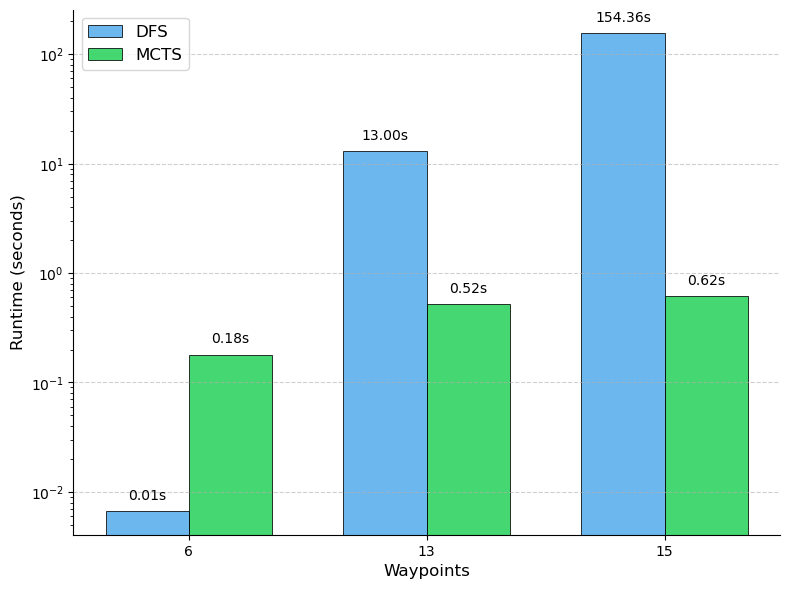

In [134]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.bar(index - bar_width/2, dfs_means, bar_width, label='DFS', color=bar_colors[0], edgecolor='black', linewidth=0.7, alpha=0.8)
plt.bar(index + bar_width/2, mcts_means, bar_width, label='MCTS', color=bar_colors[1], edgecolor='black', linewidth=0.7, alpha=0.8)

# Logarithmic scale for y-axis
plt.yscale('log')

# show avg runtime on top of bars
for i, mean_value in enumerate(dfs_means):
    plt.text(index[i] - bar_width/2, mean_value * 1.2, f'{mean_value:.2f}s', ha='center', va='bottom', fontsize=10, color='black')
for i, mean_value in enumerate(mcts_means):
    plt.text(index[i] + bar_width/2, mean_value * 1.2, f'{mean_value:.2f}s', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Waypoints', fontsize=12)
plt.ylabel('Runtime (seconds)', fontsize=12)

# add padding between title and plot
# plt.title('Average Runtimes for MCTS and DFS by Waypoint', fontsize=14, pad=20)

plt.xticks(index, waypoints)
plt.legend(loc='upper left', fontsize=12)

# add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()